In [17]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load validation or test dataset

In [18]:

X_val = np.load(r'path\S1_preprocessing\X_val.npy')
y_val = np.load(r'path\S1_preprocessing\y_val.npy')

# Load the saved models

In [19]:
unet_model = load_model(r'path\S3_training\Unet_trained_model.keras')
unetpp_model = load_model(r'path\S3_training\Unetpp_trained_model.keras')
resunet_model = load_model(r'path\S3_training\resunet_trained_model.keras')

# Make predictions using each model

In [20]:
unet_predictions = unet_model.predict(X_val)
unetpp_predictions = unetpp_model.predict(X_val)
resunet_predictions = resunet_model.predict(X_val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 993ms/step


# Ensemble the predictions (for example, using averaging)

In [21]:

ensemble_predictions = (unet_predictions + unetpp_predictions + resunet_predictions) / 2

# Reshape the ground truth labels to match the shape of ensemble predictions

In [22]:
y_val_reshaped = np.repeat(y_val[:, :, :, np.newaxis], 2, axis=-1)

# Compute the ensemble loss and accuracy manually

In [23]:

ensemble_loss = np.mean(np.abs(ensemble_predictions - y_val_reshaped))
ensemble_accuracy = np.mean((np.argmax(ensemble_predictions, axis=-1) == np.argmax(y_val_reshaped, axis=-1)).astype(np.float32))

In [24]:
print("Ensemble Loss:", ensemble_loss)
print("Ensemble Accuracy:", ensemble_accuracy)


Ensemble Loss: 0.4271483
Ensemble Accuracy: 0.7588628


In [25]:
# Save ensemble predictions
np.save('ensemble_predictions.npy', ensemble_predictions)

In [26]:
ensemble_pred_2d = np.argmax(ensemble_predictions, axis=-1)

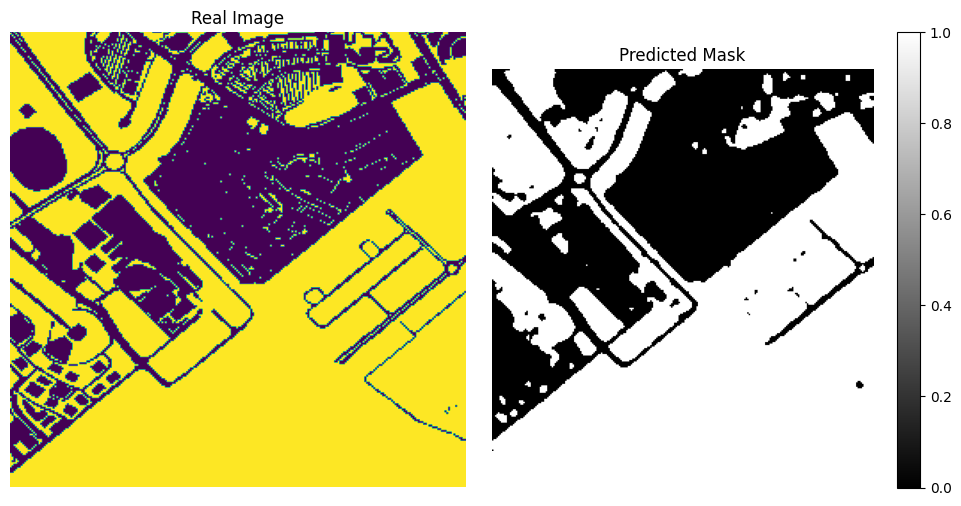

In [27]:
plt.figure(figsize=(10, 5))

# Plot the real image
plt.subplot(1, 2, 1)
plt.imshow(y_val[0])
plt.title('Real Image')
plt.axis('off')

# Plot the predicted mask
plt.subplot(1, 2, 2)
plt.imshow(ensemble_pred_2d[0], cmap='gray')
plt.title('Predicted Mask')
plt.colorbar()
plt.axis('off')

plt.tight_layout()
plt.show()
